## Support Vector Machine (Classification)


## Create a binary classification problem using sklearn.datasets.make_moons. Build an SVM classifier model and investigate the effect of hyper-parameters C, γ, and kernels on the model performance.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_decision_regions

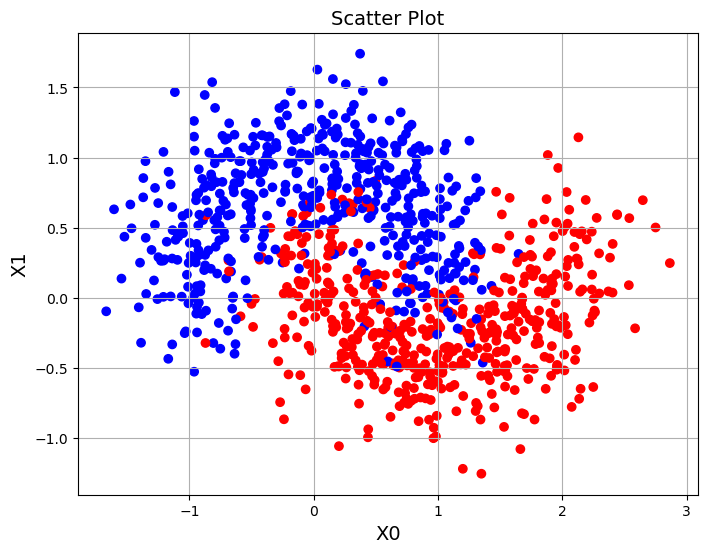

In [79]:
#importing moons dataset
from sklearn.datasets import make_moons

#randomly selecting 1000 samples
X, y = make_moons(n_samples = 1000, 
                  noise = 0.3, 
                  random_state=42)

#Plotting the graph
colors = ["blue" if label == 0 else "red" for label in y]

plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], color = colors)
plt.xlabel("X0", fontsize = 14)
plt.ylabel("X1", fontsize=14)
plt.title("Scatter Plot", fontsize=14)
plt.grid();

In [5]:
#values of X
X

array([[-0.17186341,  0.59624885],
       [ 1.25328273, -0.26541353],
       [ 0.72322405,  0.2319425 ],
       ...,
       [ 1.77095705, -0.50943619],
       [-1.06177158,  0.006786  ],
       [ 0.76117231,  0.65196041]])

In [6]:
#values of y
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
#splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# scaling the X values since SVM is sensitive to the scale of values
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Model 1 Linear Kernel

In [10]:
model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.85

In [11]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8533333333333334

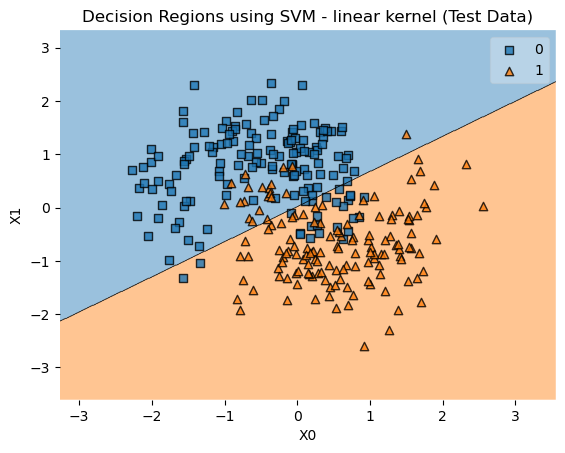

In [12]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - linear kernel (Test Data)');

From the graph, we can observe that, using linear kernal for non linear data, produce less training and testing accuracy

### Model 2 Polynomial Kernel with degree 3

In [15]:
model = SVC(kernel="poly", degree=3)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.8542857142857143

In [16]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.85

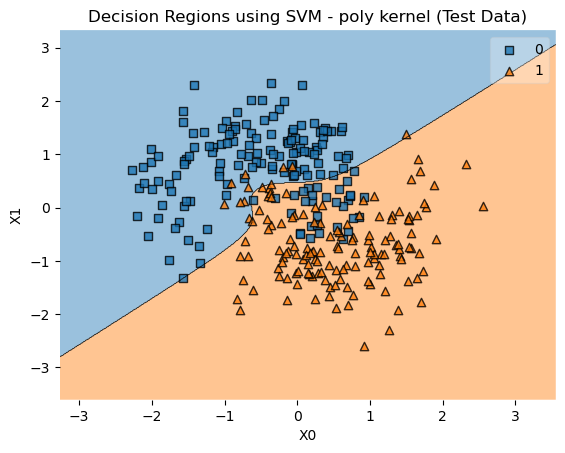

In [17]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - poly kernel (Test Data)');

From the graph, we can observe that, using poly kernal with default gamma and C values gives less training and testing accuracy

### Model 3 Poly Kernel, degree 3 and gamma value 0.1

In [20]:
model = SVC(kernel="poly", degree=3, gamma = 0.1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.8385714285714285

In [21]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8466666666666667

In [22]:
model = SVC(kernel="rbf", gamma=0.1)
model.fit(X_train_scaled, y_train)

SVC(gamma=0.1)

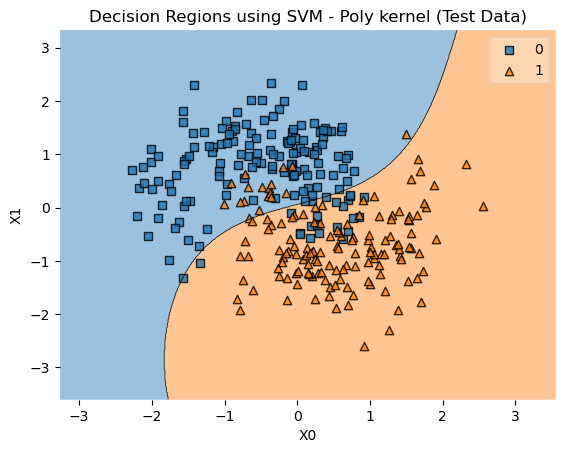

In [23]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - Poly kernel (Test Data)');

From the graph, we can observe that, using poly kernal with default C value and gamma 0.1 also gives less training and testing accuracy

### Model 4 Poly Kernel, degree 3 and gamma value 0.1 and C = 10

In [26]:
model = SVC(kernel="poly", degree=3, gamma = 0.1, C=10)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.85

In [27]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8533333333333334

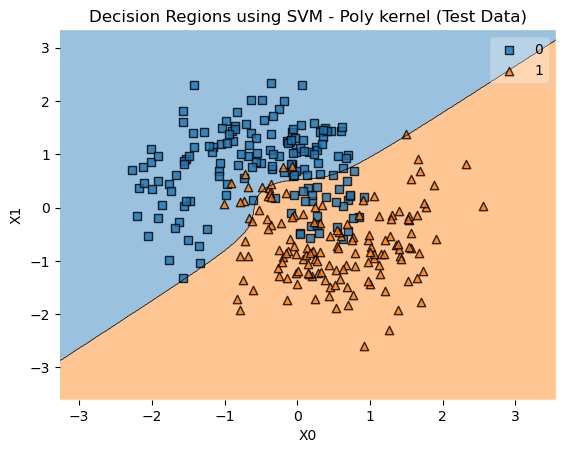

In [28]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - Poly kernel (Test Data)');

From the graph, we can observe that, using poly kernal with C 10 value and gamma 0.1 is same as linear kernal with less training and testing accuracy

### Model 5 Radial Basis function(rbf) Kernel gamma value 100

In [31]:
model = SVC(kernel="rbf", gamma=100)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9642857142857143

In [32]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.87

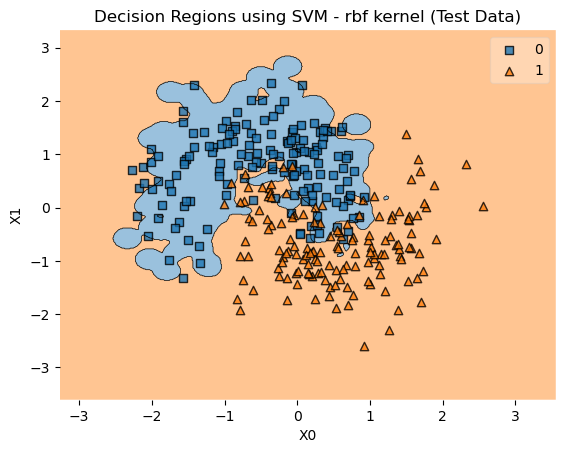

In [33]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - rbf kernel (Test Data)');

From the graph, we can observe that, using rbf kernal with default C value and gamma 100 also gives less testing and high training accuracy. So it is overfitting

### Model 6 RBF Kernel, C value 10 and gamma value 0.1

In [93]:
model = SVC(kernel="rbf", gamma=1.5, C=10)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214285714285714

In [95]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.91

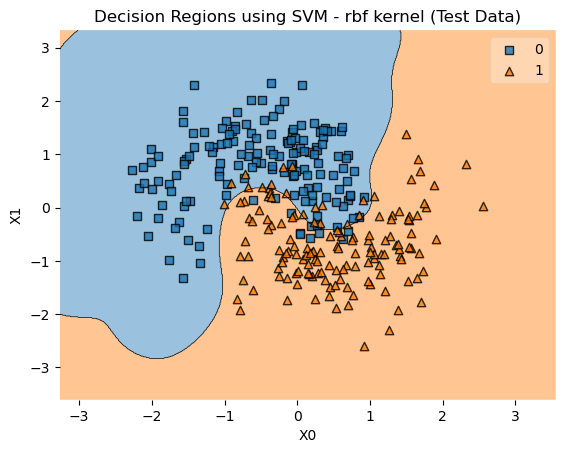

In [97]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - rbf kernel (Test Data)');

From the graph, we can observe that, using rbf kernal with C 10 and gamma 1.5 also gives good testing and training accuracy. Moreover, it is not overfitting. Finding the trade-off between gamma and C values reduce overfitting

### Model 7 Sigmoid Kernel, gamma value 0.1

In [41]:
model = SVC(kernel="sigmoid", gamma=0.1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.84

In [42]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8466666666666667

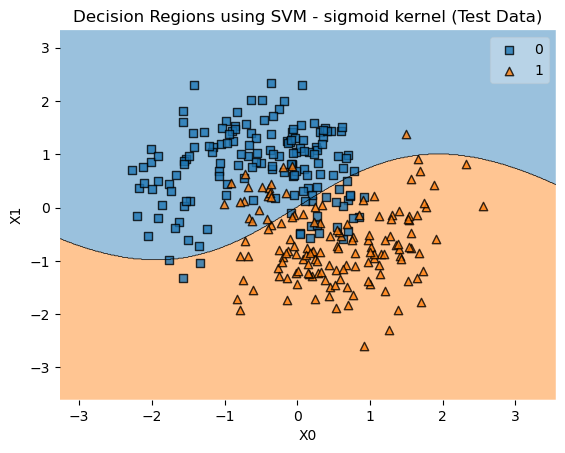

In [43]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - sigmoid kernel (Test Data)');

From the graph, we can observe that, using sigmoid kernal with default C and gamma 0.1 also gives less testing and training accuracy but it is not overfitting.

### Using GridSearchCV for hyperparameter tuning

In [103]:
# defining parameter range 
param_grid = {'C': range(1, 100, 10),  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','poly','rbf', 'sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, cv = 10, scoring="accuracy") 
  
# fitting the model for grid search 
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': range(1, 100, 10),
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [104]:
print(grid.best_params_)

{'C': 11, 'gamma': 1, 'kernel': 'rbf'}


In [105]:
print(grid.best_score_)

0.9128571428571428


In [49]:
grid.score(X_test_scaled, y_test)

0.9133333333333333

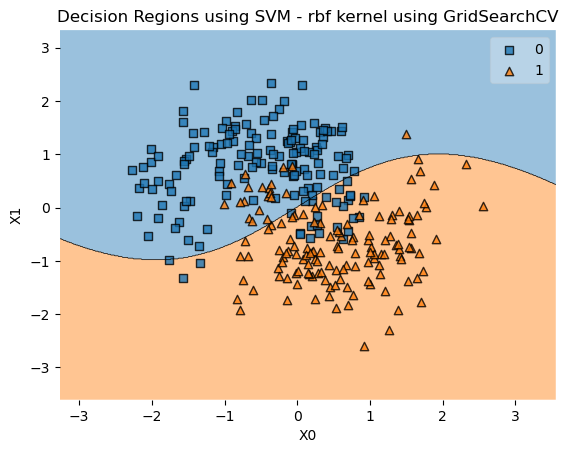

In [85]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - rbf kernel using GridSearchCV');

Using GridSeachCV, we found that RBF kernel with gamma 1 and C 10 gives the best training set accuracy of 91.5% and testing set accuracy of 91.3% for this dataset